EDA Process

In [1]:
#import the required libraries

import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
tata = yf.download("TATASTEEL.NS")

C:\Users\kumar\AppData\Local\Temp\ipykernel_11280\1306936252.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tata = yf.download("TATASTEEL.NS")
[*********************100%***********************]  1 of 1 completed


In [3]:
tata

Price,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,
1996-01-01,5.085221,5.097982,5.016312,5.078840,10242229
1996-01-02,4.990790,5.097982,4.978029,5.078840,16954313
1996-01-03,4.992064,5.104360,4.978027,4.990788,13514114
1996-01-04,4.833831,4.912948,4.721534,4.912948,34785820
1996-01-05,4.738122,4.798099,4.689631,4.775130,30138033
...,...,...,...,...,...
2025-07-11,159.839996,161.619995,159.320007,160.639999,20689511
2025-07-14,160.440002,161.119995,159.300003,159.839996,15152964


In [4]:
tata.columns

MultiIndex([( 'Close', 'TATASTEEL.NS'),
            (  'High', 'TATASTEEL.NS'),
            (   'Low', 'TATASTEEL.NS'),
            (  'Open', 'TATASTEEL.NS'),
            ('Volume', 'TATASTEEL.NS')],
           names=['Price', 'Ticker'])

In [5]:
# Flatten multiindex if needed
if isinstance(tata.columns, pd.MultiIndex):
    tata.columns = [col[0] for col in tata.columns]
    
# Rename columns
tata.rename(columns={
    "Close": "Price",
    "Open": "Open",
    "High": "High",
    "Low": "Low",
    "Volume": "Volume",
    "Adj Close": "Adj_close"
}, inplace=True)

In [6]:
tata

,Price,High,Low,Open,Volume
Date,,,,,
1996-01-01,5.085221,5.097982,5.016312,5.078840,10242229
1996-01-02,4.990790,5.097982,4.978029,5.078840,16954313
1996-01-03,4.992064,5.104360,4.978027,4.990788,13514114
1996-01-04,4.833831,4.912948,4.721534,4.912948,34785820
1996-01-05,4.738122,4.798099,4.689631,4.775130,30138033
...,...,...,...,...,...
2025-07-11,159.839996,161.619995,159.320007,160.639999,20689511
2025-07-14,160.440002,161.119995,159.300003,159.839996,15152964
2025-07-15,159.000000,160.850006,157.949997,160.259995,17993051


<Axes: xlabel='Date'>

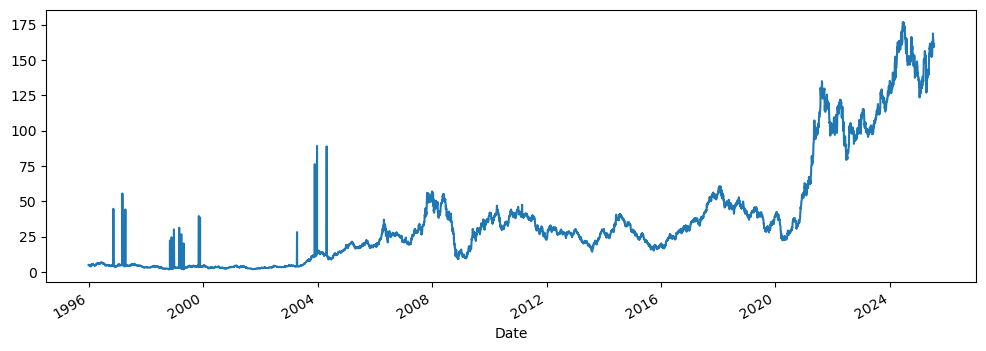

In [7]:
#Ploting

tata["High"].plot(figsize=(12,4))

<Axes: xlabel='Date'>

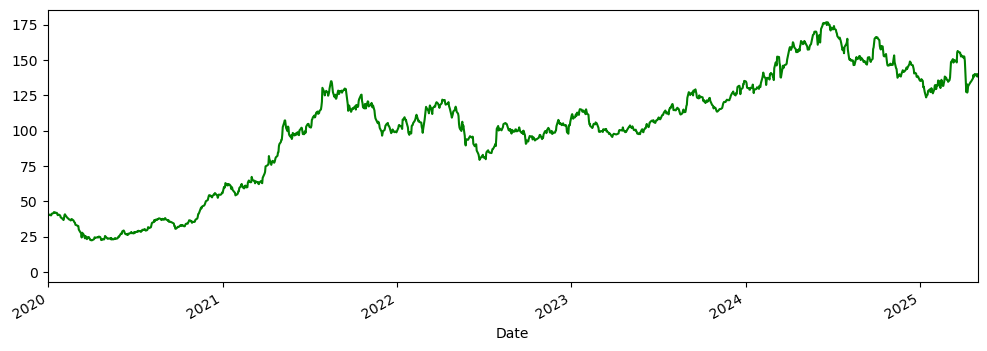

In [8]:
#x limit

tata["High"].plot(xlim=["2020-01","2025-05"],figsize=(12,4),c="green")

In [10]:
#indexing from 2020-02-01 to 2020-03-01

index =  tata.loc['2020-02-01':'2020-03-01'].index

share_open = tata.loc['2020-02-01':'2020-03-01']['Open']

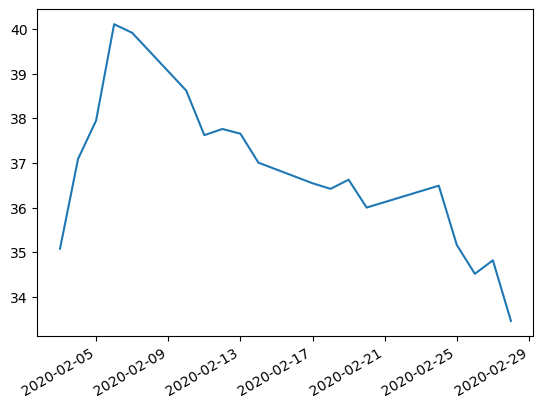

In [11]:
#Ploting the index and Share open of 2020 February 
figure,axis = plt.subplots()

#To prevent dates overlapping, we use autofmt_xdate function
figure.autofmt_xdate()

axis.plot(index,share_open)

ARIMA Model

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv("tatasteel_stock.csv")

In [17]:
df.head()

,Date,Price,High,Low,Open,Volume
0,1996-01-01,8.987900,9.010454,8.866107,8.976623,10242229
1,1996-01-02,8.820998,9.010455,8.798444,8.976624,16954313
2,1996-01-03,8.823254,9.021732,8.798444,8.820998,13514114
3,1996-01-04,8.543581,8.683418,8.345102,8.683418,34785820
4,1996-01-05,8.374422,8.480427,8.288716,8.439831,30138033


In [18]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df = df.asfreq(df.index.inferred_freq or 'B')

In [19]:
df[['Price']].isna().sum()

Price    292
dtype: int64

In [20]:
df = df[['Price']].dropna()

In [21]:
df

,Price
Date,
1996-01-01,8.987900
1996-01-02,8.820998
1996-01-03,8.823254
1996-01-04,8.543581
1996-01-05,8.374422
...,...
2025-06-20,151.970001
2025-06-23,152.429993
2025-06-24,154.789993


In [22]:
df.index=pd.DatetimeIndex(df.index)
df.index.freq=df.index.inferred_freq

In [23]:
train_size=int(len(df)*0.8)
train = df[:train_size]
test = df[train_size:]

In [24]:
train

,Price
Date,
1996-01-01,8.987900
1996-01-02,8.820998
1996-01-03,8.823254
1996-01-04,8.543581
1996-01-05,8.374422
...,...
2019-06-20,40.969284
2019-06-21,40.695343
2019-06-24,39.763107


In [25]:
auto_model=auto_arima(train,seasonal=False,stepwise=True,suppress_warnings=True)
p,d,q=auto_model.order
print(f"Best ARIMA order: (p={p}, d={d}, q={q})")
model=ARIMA(train,order=(p,d,q))
fitted_model=model.fit()

Best ARIMA order: (p=1, d=1, q=2)


In [26]:
forecast = fitted_model.forecast(steps=len(test))
forecast_series = pd.Series(forecast, index=test.index)

In [27]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 59.14
RMSE: 69.89


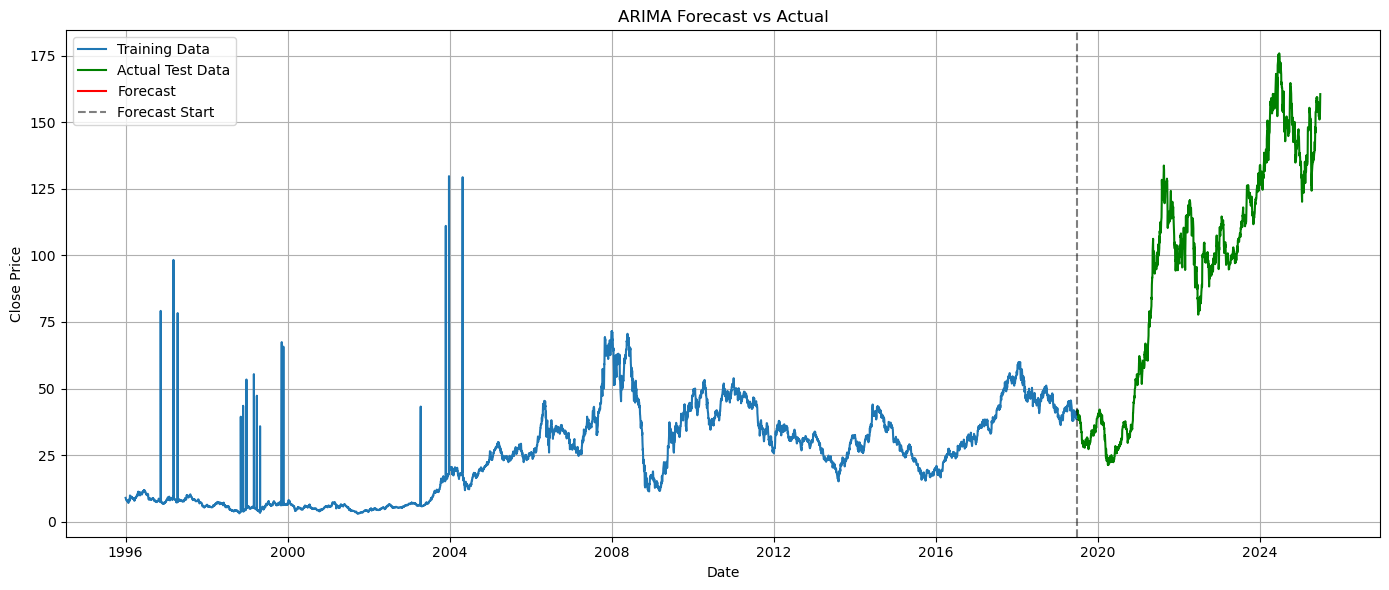

In [28]:
plt.figure(figsize=(14, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data', color = "green")
plt.plot(forecast_series, label='Forecast', color='red')
plt.axvline(test.index[0], color='black', linestyle='--', alpha=0.5, label='Forecast Start')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
final_model=ARIMA(df,order=(p,d,q))
final_fit=final_model.fit()
future_steps=180

In [30]:
future_forecast=final_fit.get_forecast(steps=future_steps)
future_mean=future_forecast.predicted_mean
conf_int=future_forecast.conf_int()

In [31]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='B')

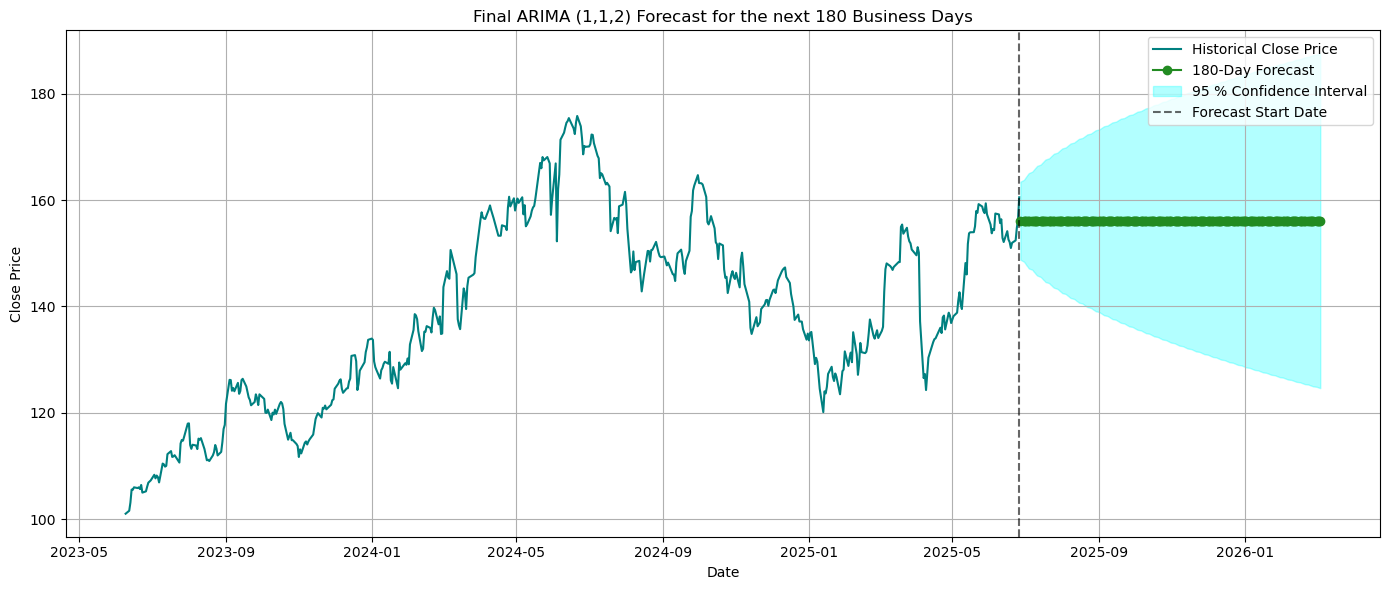

In [32]:
plt.figure(figsize=(14,6))
recent_data = df[df.index >= df.index[-252*2]]  # roughly last 2 years of business days
plt.plot(recent_data, label="Historical Close Price", color = "teal")
plt.plot(future_dates,future_mean,label='180-Day Forecast',color='forestgreen',marker='o',linestyle='solid')
plt.fill_between(future_dates,conf_int.iloc[:,0],conf_int.iloc[:,1],color='cyan',alpha=0.3,label='95 % Confidence Interval')
plt.axvline(x=last_date,color='black',linestyle='--',alpha=0.6,label='Forecast Start Date')
plt.title(f"Final ARIMA ({p},{d},{q}) Forecast for the next 180 Business Days")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

SARIMAX Model

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
# Load Tata Steel stock data
df = pd.read_csv("tatasteel_stock.csv")

df.head()

,Date,Price,High,Low,Open,Volume
0,1996-01-01,8.987900,9.010454,8.866107,8.976623,10242229
1,1996-01-02,8.820998,9.010455,8.798444,8.976624,16954313
2,1996-01-03,8.823254,9.021732,8.798444,8.820998,13514114
3,1996-01-04,8.543581,8.683418,8.345102,8.683418,34785820
4,1996-01-05,8.374422,8.480427,8.288716,8.439831,30138033


In [35]:
df = df[["Price"]].dropna()
df.columns = ["y"]
df["Date"] = df.index

In [36]:
# Train-test split
train_size = int(len(df) * 0.85)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [37]:
# Build SARIMAX model (example: seasonal = 12 months)
model = SARIMAX(
    train["y"],
    order=(1, 1, 1),             # ARIMA (p,d,q)
    seasonal_order=(1, 1, 1, 12), # Seasonal (P,D,Q,s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

In [38]:
model_fit = model.fit(disp=False)

In [39]:
# Forecast
n_forecast = len(test)
forecast = model_fit.forecast(steps=n_forecast)
forecast.index = test.index

In [40]:
# Evaluation
mse = mean_squared_error(test["y"], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test["y"], forecast)
r2 = r2_score(test["y"], forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 63.56
MAE: 58.61
R²: -4.72


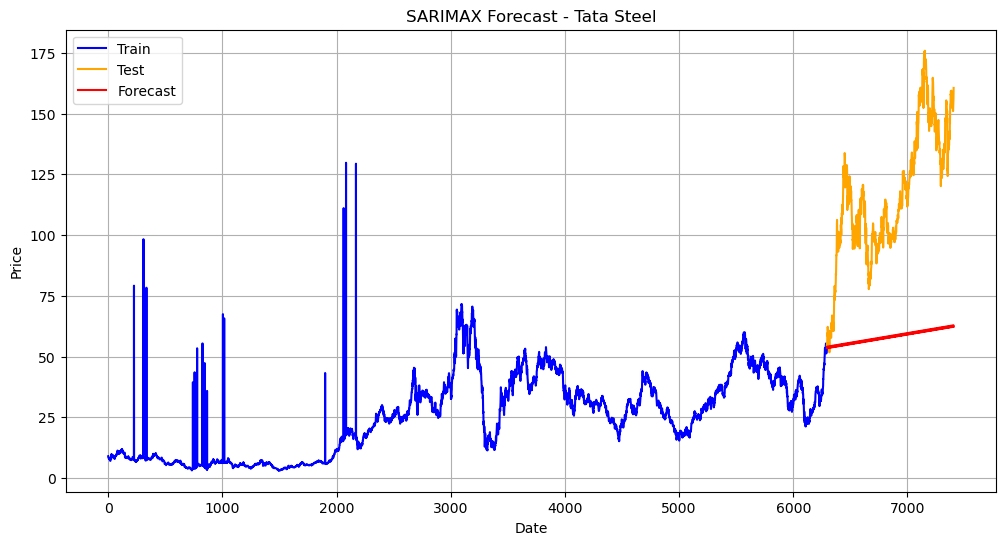

In [41]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(train["Date"], train["y"], label="Train", color="blue")
plt.plot(test["Date"], test["y"], label="Test", color="orange")
plt.plot(forecast.index, forecast, label="Forecast", color="red")
plt.title("SARIMAX Forecast - Tata Steel")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Facebook Prophe Model

In [42]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [43]:
df = pd.read_csv("tatasteel_stock.csv")

In [44]:
df.head()

,Date,Price,High,Low,Open,Volume
0,1996-01-01,8.987900,9.010454,8.866107,8.976623,10242229
1,1996-01-02,8.820998,9.010455,8.798444,8.976624,16954313
2,1996-01-03,8.823254,9.021732,8.798444,8.820998,13514114
3,1996-01-04,8.543581,8.683418,8.345102,8.683418,34785820
4,1996-01-05,8.374422,8.480427,8.288716,8.439831,30138033


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405 entries, 0 to 7404
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7405 non-null   object 
 1   Price   7405 non-null   float64
 2   High    7405 non-null   float64
 3   Low     7405 non-null   float64
 4   Open    7405 non-null   float64
 5   Volume  7405 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 347.2+ KB


In [46]:
df["Date"] = pd.to_datetime(df["Date"])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7405 entries, 0 to 7404
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7405 non-null   datetime64[ns]
 1   Price   7405 non-null   float64       
 2   High    7405 non-null   float64       
 3   Low     7405 non-null   float64       
 4   Open    7405 non-null   float64       
 5   Volume  7405 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 347.2 KB


In [48]:
df_1 = df[["Date","Open"]]

In [49]:
df_1

,Date,Open
0,1996-01-01,8.976623
1,1996-01-02,8.976624
2,1996-01-03,8.820998
3,1996-01-04,8.683418
4,1996-01-05,8.439831
...,...,...
7400,2025-06-20,150.750000
7401,2025-06-23,150.500000
7402,2025-06-24,153.800003
7403,2025-06-25,155.899994


In [50]:
df_1.columns = ["ds","y"]

In [51]:
df_1

,ds,y
0,1996-01-01,8.976623
1,1996-01-02,8.976624
2,1996-01-03,8.820998
3,1996-01-04,8.683418
4,1996-01-05,8.439831
...,...,...
7400,2025-06-20,150.750000
7401,2025-06-23,150.500000
7402,2025-06-24,153.800003
7403,2025-06-25,155.899994


In [52]:
model = Prophet()

In [53]:
model.fit(df_1)

17:14:54 - cmdstanpy - INFO - Chain [1] start processing
17:14:59 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [55]:
future_dates = model.make_future_dataframe(periods = 365)

In [56]:
future_dates.tail()

,ds
7765,2026-06-22
7766,2026-06-23
7767,2026-06-24
7768,2026-06-25
7769,2026-06-26


In [57]:
df_1

,ds,y
0,1996-01-01,8.976623
1,1996-01-02,8.976624
2,1996-01-03,8.820998
3,1996-01-04,8.683418
4,1996-01-05,8.439831
...,...,...
7400,2025-06-20,150.750000
7401,2025-06-23,150.500000
7402,2025-06-24,153.800003
7403,2025-06-25,155.899994


In [58]:
prediction = model.predict(future_dates)

In [59]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7765,2026-06-22,179.186473,169.093741,197.637138,175.403989,183.067570,4.231394,4.231394,4.231394,4.082012,4.082012,4.082012,0.149381,0.149381,0.149381,0.0,0.0,0.0,183.417867
7766,2026-06-23,179.245739,168.585305,197.322946,175.427828,183.151344,4.213364,4.213364,4.213364,4.058935,4.058935,4.058935,0.154429,0.154429,0.154429,0.0,0.0,0.0,183.459102
7767,2026-06-24,179.305004,168.066606,196.080296,175.470827,183.226213,4.054647,4.054647,4.054647,3.895309,3.895309,3.895309,0.159338,0.159338,0.159338,0.0,0.0,0.0,183.359651
7768,2026-06-25,179.364270,169.594447,197.979415,175.513827,183.311057,4.083302,4.083302,4.083302,3.919626,3.919626,3.919626,0.163676,0.163676,0.163676,0.0,0.0,0.0,183.447572
7769,2026-06-26,179.423535,170.026830,196.739466,175.556827,183.394589,3.993671,3.993671,3.993671,3.826615,3.826615,3.826615,0.167056,0.167056,0.167056,0.0,0.0,0.0,183.417206


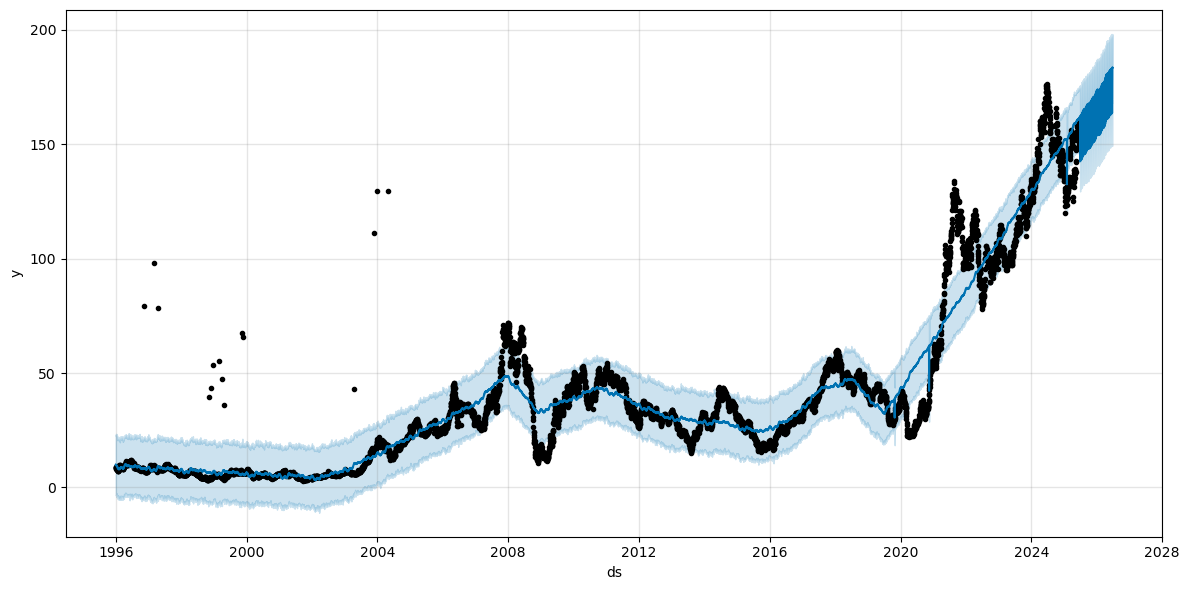

In [60]:
m_plot = model.plot(prediction,figsize = (12,6))

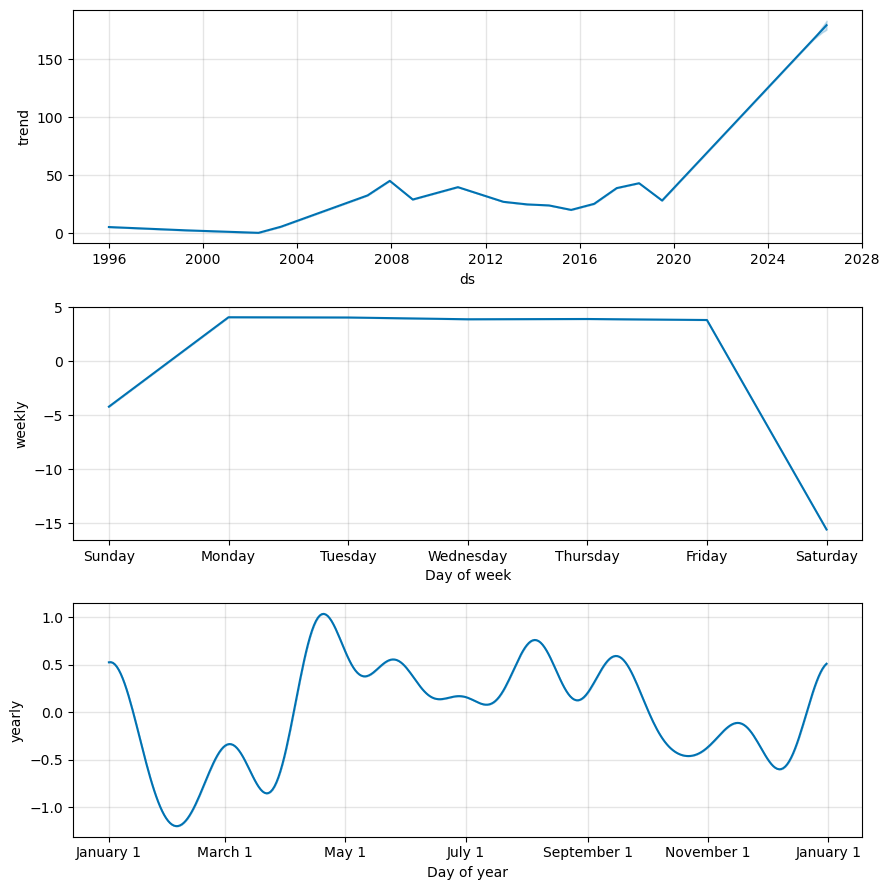

In [61]:
model_com = model.plot_components(prediction)

In [62]:
df_cv = cross_validation(model , initial = '730 days', period = '180 days', horizon = '365 days')

  0%|          | 0/54 [00:00<?, ?it/s]

17:16:38 - cmdstanpy - INFO - Chain [1] start processing
17:16:38 - cmdstanpy - INFO - Chain [1] done processing
17:16:39 - cmdstanpy - INFO - Chain [1] start processing
17:16:39 - cmdstanpy - INFO - Chain [1] done processing
17:16:40 - cmdstanpy - INFO - Chain [1] start processing
17:16:40 - cmdstanpy - INFO - Chain [1] done processing
17:16:40 - cmdstanpy - INFO - Chain [1] start processing
17:16:40 - cmdstanpy - INFO - Chain [1] done processing
17:16:41 - cmdstanpy - INFO - Chain [1] start processing
17:16:41 - cmdstanpy - INFO - Chain [1] done processing
17:16:41 - cmdstanpy - INFO - Chain [1] start processing
17:16:42 - cmdstanpy - INFO - Chain [1] done processing
17:16:42 - cmdstanpy - INFO - Chain [1] start processing
17:16:42 - cmdstanpy - INFO - Chain [1] done processing
17:16:43 - cmdstanpy - INFO - Chain [1] start processing
17:16:43 - cmdstanpy - INFO - Chain [1] done processing
17:16:44 - cmdstanpy - INFO - Chain [1] start processing
17:16:44 - cmdstanpy - INFO - Chain [1]

In [63]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1998-05-15,6.472619,0.071563,13.310399,6.942222,1998-05-14
1,1998-05-18,6.505773,-0.489448,13.199236,6.867793,1998-05-14
2,1998-05-19,6.539900,-0.425497,13.858574,6.901625,1998-05-14
3,1998-05-20,6.038491,-1.185714,12.844413,7.030183,1998-05-14
4,1998-05-21,6.110581,-0.705144,13.059300,7.003118,1998-05-14
...,...,...,...,...,...,...
13498,2025-06-20,155.254816,140.247182,170.410604,150.750000,2024-06-26
13499,2025-06-23,155.564349,140.988031,172.173173,150.500000,2024-06-26
13500,2025-06-24,155.511538,139.425796,169.257222,153.800003,2024-06-26
13501,2025-06-25,155.319775,139.782757,171.162229,155.899994,2024-06-26


In [64]:
df_p = performance_metrics(df_cv)

In [65]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,231.793036,15.224751,9.627835,0.279621,0.226804,0.267547,0.623476
1,38 days,230.290723,15.175333,9.606272,0.278496,0.226804,0.267056,0.625285
2,39 days,233.287568,15.273754,9.645348,0.279580,0.227759,0.267418,0.624979
3,40 days,229.045994,15.134266,9.593166,0.277575,0.227141,0.265908,0.624184
4,41 days,229.215282,15.139857,9.618027,0.280141,0.226514,0.266845,0.622279
...,...,...,...,...,...,...,...,...
324,361 days,373.868875,19.335689,12.726821,0.388259,0.282710,0.372238,0.537778
325,362 days,377.832555,19.437915,12.808887,0.390668,0.285752,0.374836,0.534815
326,363 days,381.430776,19.530253,12.863411,0.392628,0.286481,0.376525,0.535146
327,364 days,380.715024,19.511920,12.836456,0.389592,0.286018,0.375123,0.535556


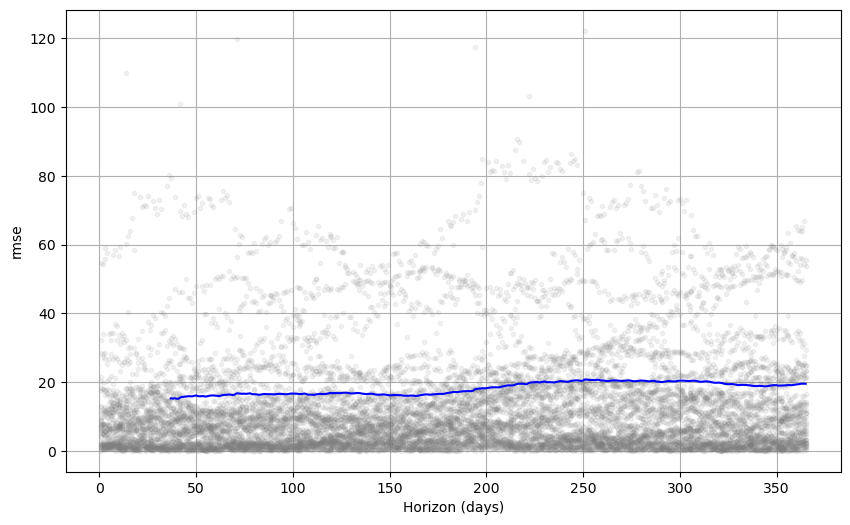

In [66]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv , metric = 'rmse')

In [67]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7765,2026-06-22,179.186473,169.093741,197.637138,175.403989,183.067570,4.231394,4.231394,4.231394,4.082012,4.082012,4.082012,0.149381,0.149381,0.149381,0.0,0.0,0.0,183.417867
7766,2026-06-23,179.245739,168.585305,197.322946,175.427828,183.151344,4.213364,4.213364,4.213364,4.058935,4.058935,4.058935,0.154429,0.154429,0.154429,0.0,0.0,0.0,183.459102
7767,2026-06-24,179.305004,168.066606,196.080296,175.470827,183.226213,4.054647,4.054647,4.054647,3.895309,3.895309,3.895309,0.159338,0.159338,0.159338,0.0,0.0,0.0,183.359651
7768,2026-06-25,179.364270,169.594447,197.979415,175.513827,183.311057,4.083302,4.083302,4.083302,3.919626,3.919626,3.919626,0.163676,0.163676,0.163676,0.0,0.0,0.0,183.447572
7769,2026-06-26,179.423535,170.026830,196.739466,175.556827,183.394589,3.993671,3.993671,3.993671,3.826615,3.826615,3.826615,0.167056,0.167056,0.167056,0.0,0.0,0.0,183.417206


In [68]:
# Filter only future dates
future_forecast = prediction[prediction["ds"] > df_1["ds"].max()]
print(future_forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head(15))

             ds        yhat  yhat_lower  yhat_upper
7405 2025-06-27  161.846943  148.496932  174.476185
7406 2025-06-28  142.498969  129.343858  155.097564
7407 2025-06-29  153.935669  141.978114  167.668488
7408 2025-06-30  162.275284  149.629206  175.826718
7409 2025-07-01  162.306320  148.463676  175.436847
7410 2025-07-02  162.195185  149.350275  175.549355
7411 2025-07-03  162.270597  149.359479  174.744579
7412 2025-07-04  162.227600  148.733407  174.634278
7413 2025-07-05  142.869550  130.591578  156.353950
7414 2025-07-06  154.297689  140.968530  167.119585
7415 2025-07-07  162.630828  149.988570  174.763169
7416 2025-07-08  162.657985  149.066484  175.031121
7417 2025-07-09  162.546005  149.130606  175.870473
7418 2025-07-10  162.623947  149.302146  175.539100
7419 2025-07-11  162.587094  150.441464  175.154615


LSTM Model

In [69]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [70]:
df = pd.read_csv("tatasteel_stock.csv")

In [71]:
df.tail()

,Date,Price,High,Low,Open,Volume
7400,2025-06-20,151.970001,153.169998,150.630005,150.750000,29944714
7401,2025-06-23,152.429993,153.300003,150.479996,150.500000,17096676
7402,2025-06-24,154.789993,156.970001,153.639999,153.800003,25403324
7403,2025-06-25,156.389999,156.899994,155.509995,155.899994,18240433
7404,2025-06-26,160.539993,161.100006,156.449997,156.869995,40637736


In [72]:
df["Date"] = pd.to_datetime(df["Date"])

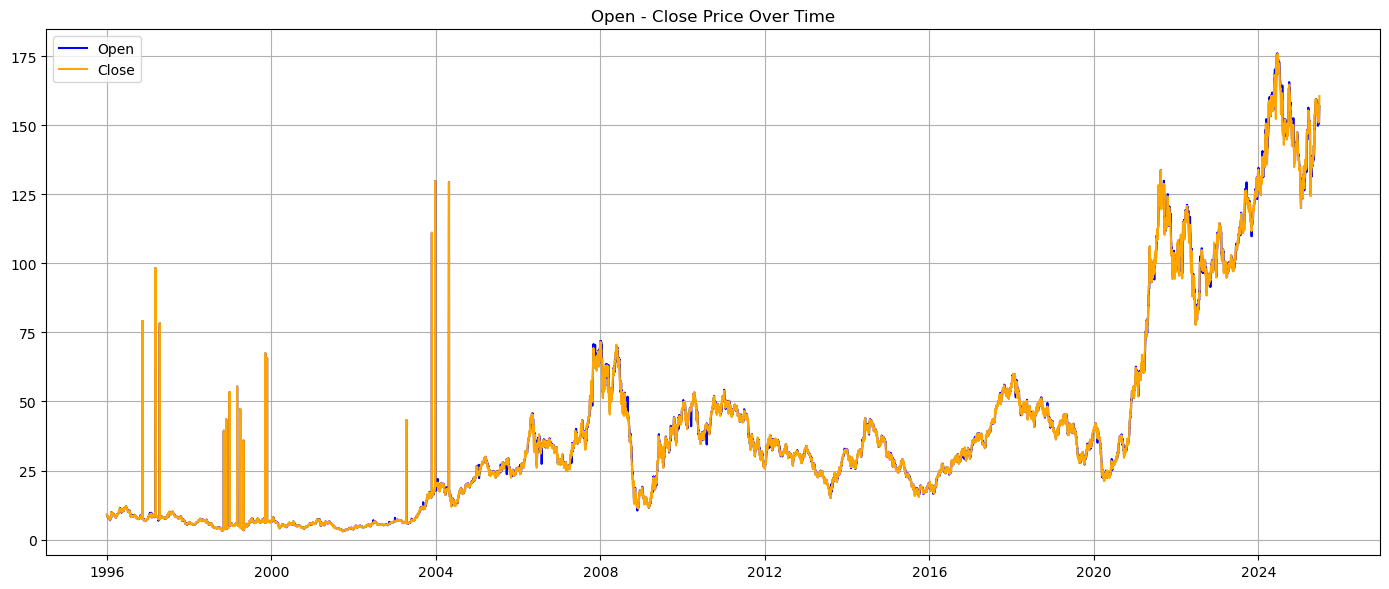

In [73]:
plt.figure(figsize = (14,6))
plt.plot(df["Date"], df["Open"], label = "Open", color = "blue")
plt.plot(df["Date"], df["Price"], label = "Close", color = "orange")
plt.title("Open - Close Price Over Time")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

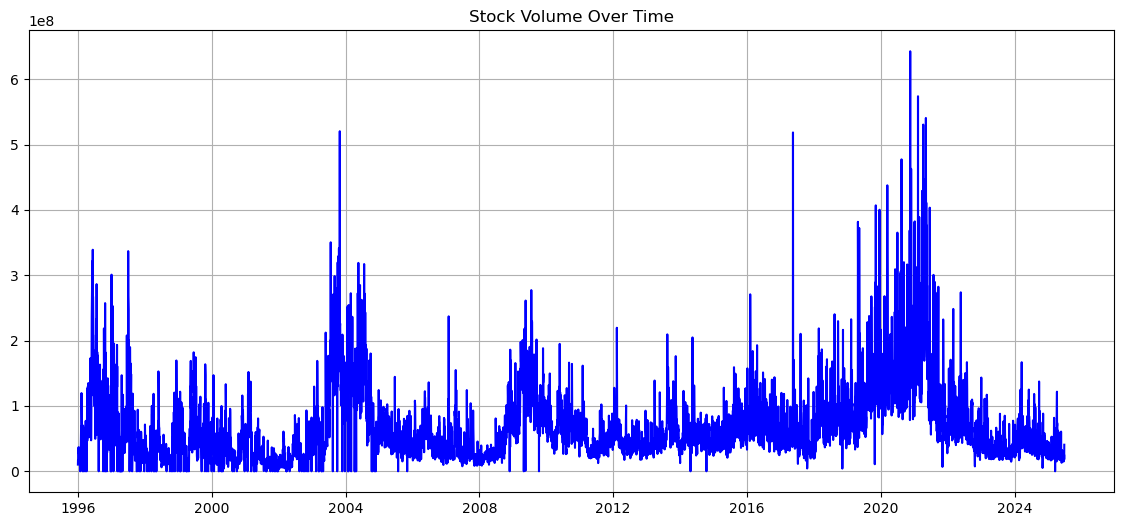

In [74]:
plt.figure(figsize = (14,6))
plt.plot(df["Date"], df["Volume"], label = "Volume", color = "blue")
plt.title("Stock Volume Over Time")
plt.grid()
plt.show()

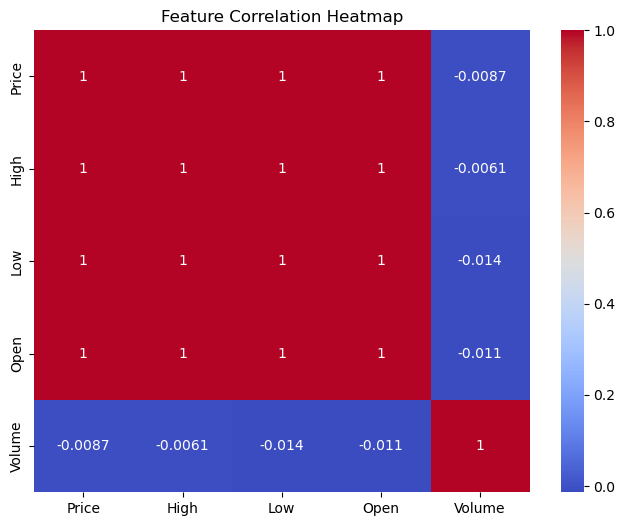

In [75]:
numeric_data = df.select_dtypes(include=("int64", "float64"))
plt.figure(figsize = (8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

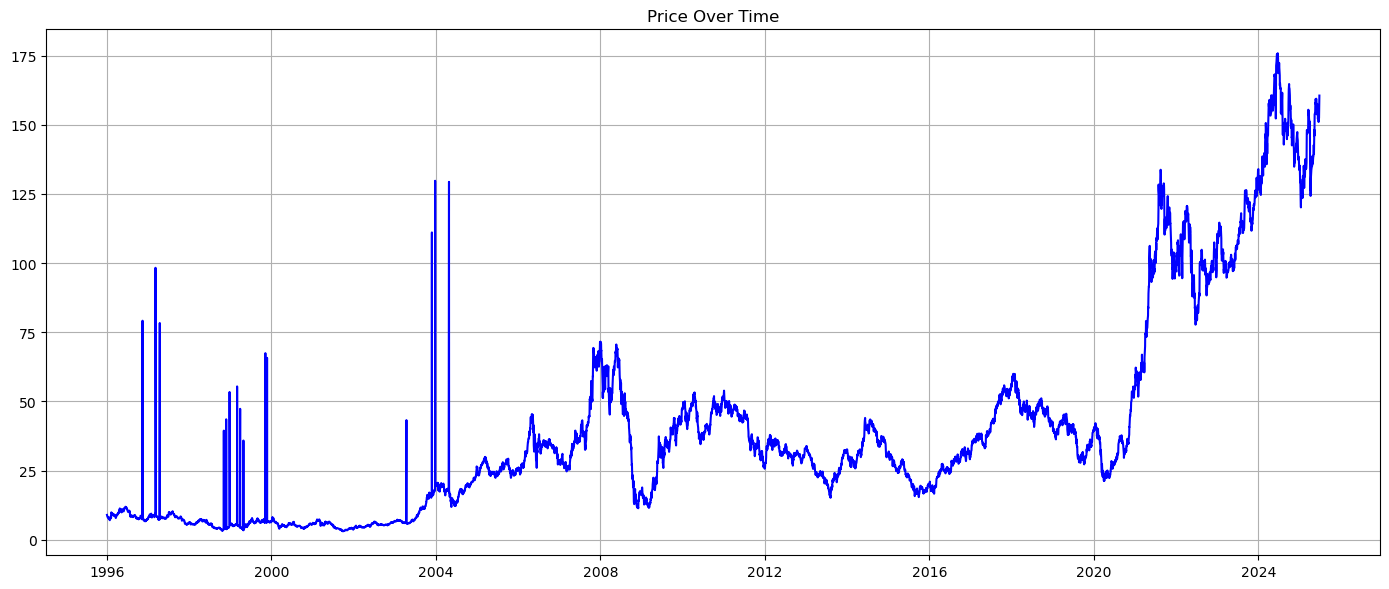

In [76]:
df["Date"] = pd.to_datetime(df["Date"])

prediction = df.loc[(df["Date"] > datetime(2013,1,1)) & (df["Date"] < datetime(2018,1,1))]

plt.figure(figsize = (14,6))
plt.plot(df["Date"], df["Price"], label = "Open", color = "blue")
plt.title("Price Over Time")
plt.grid()
plt.tight_layout()
plt.show()

In [77]:
#Prepare for LSTM Model

stock_close = df["Price"]

dataset = stock_close.values  #covert to numpy array
train_len = int(np.ceil(len(dataset) * 0.95))

#Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

train = scaled_data[:train_len]
x_train,y_train = [], []

for i in range (60, len(train)):
    x_train.append(train[i - 60:i, 0])
    y_train.append(train[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [78]:
# Build the model

model = keras.models.Sequential()

# Layer one
model.add(keras.layers.LSTM(64, return_sequences = True, input_shape = (x_train.shape[1],1)))

# Layer two
model.add(keras.layers.LSTM(64, return_sequences = False))

# Third Layer
model.add(keras.layers.Dense(128, activation="relu"))

#Fourth Layer
model.add(keras.layers.Dropout(0.5))

#Output Layer
model.add(keras.layers.Dense(1))

In [79]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(optimizer="adam", loss="mae", metrics=[keras.metrics.RootMeanSquaredError()])

In [81]:
# train the model

training = model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - loss: 0.1740 - root_mean_squared_error: 0.2955
Epoch 2/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0884 - root_mean_squared_error: 0.1480
Epoch 3/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0855 - root_mean_squared_error: 0.1538
Epoch 4/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0804 - root_mean_squared_error: 0.1526
Epoch 5/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0789 - root_mean_squared_error: 0.1455
Epoch 6/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0775 - root_mean_squared_error: 0.1475
Epoch 7/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0743 - root_mean_squared_error: 0.1328
Epoch 8/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0743 - root_mean_squared_error: 0.1340
Epoch 9/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0734 - root_mean_squared_error: 0.1554
Epoch 10/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0714 - r

In [82]:
test_data = scaled_data[train_len - 60:]
x_test, y_test = [], dataset[train_len:]

for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [83]:
# Make prediction

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


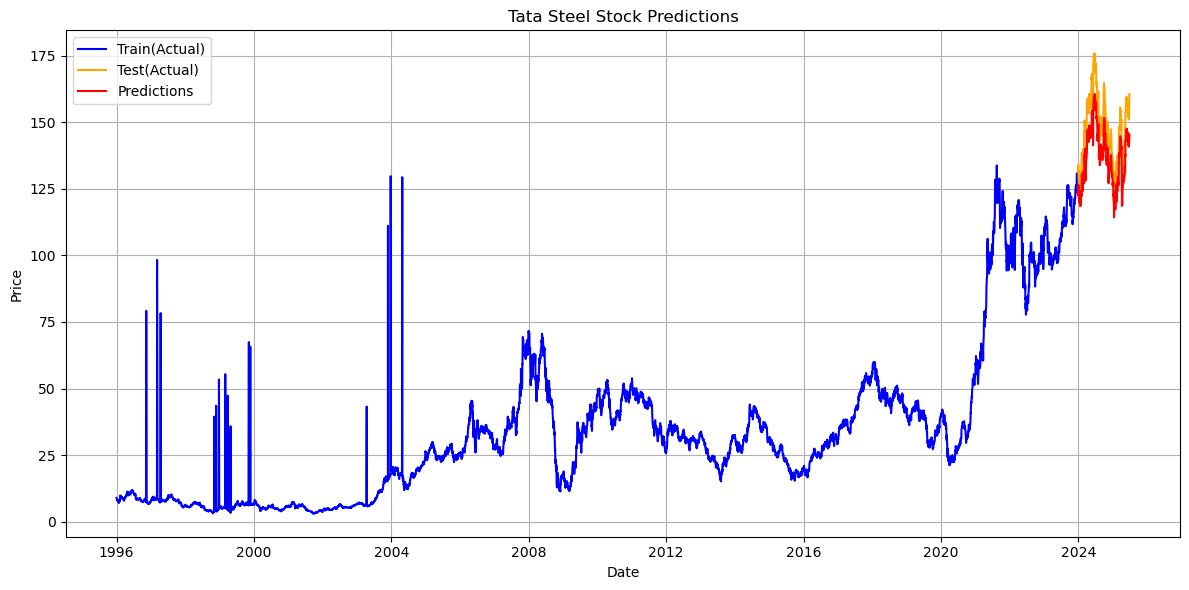

In [84]:
# Plotting data

train = df[:train_len]
test = df[train_len:]

test = test.copy()

test["Predictions"] = predictions

plt.figure(figsize=(12,6))
plt.plot(train["Date"], train["Price"], label = "Train(Actual)", color="blue")
plt.plot(test["Date"], test["Price"], label = "Test(Actual)", color="orange")
plt.plot(test["Date"], test["Predictions"], label = "Predictions", color="red")
plt.title("Tata Steel Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Thank You!!!!!